abbreviations:

PNA: pneumonia

PN: positive for pneumonia

NPN: negative for pneumonia

In [218]:
"""from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)"""

import pandas as pd
import hvplot.pandas
import numpy as np
from scipy.stats import wilcoxon
import cv2
import os
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
def normalArray(dataPath, dataImage, dataLabel):
    for filename in os.listdir(dataPath):
        img_path = os.path.join(dataPath, filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image, (224, 224))  # Resize to a common size
        image = image / 255.0  # Normalize pixel values to [0, 1]
        dataImage.append(image)
        dataLabel.append(0)
    dataImage = np.array(dataImage)
    dataLabel = np.array(dataLabel)
    return dataImage, dataLabel

In [3]:
def pnaArray(dataPath, dataImage, dataLabel):
    for filename in os.listdir(dataPath):
        img_path = os.path.join(dataPath, filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image, (224, 224))  # Resize to a common size
        image = image / 255.0  # Normalize pixel values to [0, 1]
        dataImage.append(image)
        dataLabel.append(1)
    dataImage = np.array(dataImage)
    dataLabel = np.array(dataLabel)
    return dataImage, dataLabel

/test: 234 normal, 390 pna

/val: 8 normal, 8 pna

/train: 1341 normal, 3875 pna

In [65]:
testNormal = "chest_xray/test/NORMAL"
testPNA = "chest_xray/test/PNEUMONIA"
valNormal = "chest_xray/val/NORMAL"
valPNA = "chest_xray/val/PNEUMONIA"
trainNormal = "chest_xray/train/NORMAL"
trainPNA = "chest_xray/train/PNEUMONIA"

In [5]:
os.listdir(valNormal) #check to see there's no random ".DS_Store" in directory
# if there is, run: find . -name ".DS_Store" -type f -delete
# or just run it anyway to make sure

['NORMAL2-IM-1440-0001.jpeg',
 'NORMAL2-IM-1437-0001.jpeg',
 'NORMAL2-IM-1431-0001.jpeg',
 'NORMAL2-IM-1436-0001.jpeg',
 'NORMAL2-IM-1430-0001.jpeg',
 'NORMAL2-IM-1438-0001.jpeg',
 'NORMAL2-IM-1442-0001.jpeg',
 'NORMAL2-IM-1427-0001.jpeg']

In [6]:
# images are X, labels are y
testNormalimage = []
testNormalLabel = []
testPNAimage = []
testPNALabel = []
valNormalimage = []
valNormalLabel = []
valPNAimage = []
valPNALabel = []
trainNormalimage = []
trainNormalLabel = []
trainPNAimage = []
trainPNALabel= []

In [7]:
testNormalimage, testNormalLabel = normalArray(testNormal, testNormalimage, testNormalLabel)
testNormalimage.shape

(234, 224, 224, 3)

In [8]:
testPNAimage, testPNALabel = pnaArray(testPNA, testPNAimage, testPNALabel)
testPNAimage.shape

(390, 224, 224, 3)

In [9]:
X_test = np.concatenate((testNormalimage, testPNAimage), axis=0)
X_test

array([[[[0.09803922, 0.09803922, 0.09803922],
         [0.08627451, 0.08627451, 0.08627451],
         [0.08627451, 0.08627451, 0.08627451],
         ...,
         [0.25882353, 0.25882353, 0.25882353],
         [0.31372549, 0.31372549, 0.31372549],
         [0.45490196, 0.45490196, 0.45490196]],

        [[0.09411765, 0.09411765, 0.09411765],
         [0.09019608, 0.09019608, 0.09019608],
         [0.08627451, 0.08627451, 0.08627451],
         ...,
         [0.23529412, 0.23529412, 0.23529412],
         [0.31372549, 0.31372549, 0.31372549],
         [0.46666667, 0.46666667, 0.46666667]],

        [[0.08235294, 0.08235294, 0.08235294],
         [0.08627451, 0.08627451, 0.08627451],
         [0.08235294, 0.08235294, 0.08235294],
         ...,
         [0.25490196, 0.25490196, 0.25490196],
         [0.32156863, 0.32156863, 0.32156863],
         [0.47058824, 0.47058824, 0.47058824]],

        ...,

        [[0.07843137, 0.07843137, 0.07843137],
         [0.07058824, 0.07058824, 0.07058824]

In [73]:
X_test.shape

(624, 224, 224, 3)

In [10]:
y_test = np.concatenate((testNormalLabel, testPNALabel), axis=0)
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [67]:
valNormalimage, valNormalLabel = normalArray(valNormal, valNormalimage, valNormalLabel)
valNormalimage.shape

(8, 224, 224, 3)

In [12]:
valPNAimage, valPNALabel = pnaArray(valPNA, valPNAimage, valPNALabel)
valPNAimage.shape

(8, 224, 224, 3)

In [13]:
valPNALabel

array([1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
X_val = np.concatenate((valNormalimage, valPNAimage), axis=0)
X_val

array([[[[0.03137255, 0.03137255, 0.03137255],
         [0.05490196, 0.05490196, 0.05490196],
         [0.09411765, 0.09411765, 0.09411765],
         ...,
         [0.25098039, 0.25098039, 0.25098039],
         [0.23529412, 0.23529412, 0.23529412],
         [0.23921569, 0.23921569, 0.23921569]],

        [[0.04313725, 0.04313725, 0.04313725],
         [0.05490196, 0.05490196, 0.05490196],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         ...,
         [0.27058824, 0.27058824, 0.27058824],
         [0.26666667, 0.26666667, 0.26666667],
         [0.25490196, 0.25490196, 0.25490196]],

        [[0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         [0.12941176, 0.12941176, 0.12941176],
         ...,
         [0.2745098 , 0.2745098 , 0.2745098 ],
         [0.27058824, 0.27058824, 0.27058824],
         [0.22352941, 0.22352941, 0.22352941]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [62]:
X_val.shape

(16, 224, 224, 3)

In [63]:
y_val = np.concatenate((valNormalLabel, valPNALabel), axis=0)
y_val

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
trainNormalimage, trainNormalLabel = normalArray(trainNormal, trainNormalimage, trainNormalLabel)
trainNormalimage.shape

(1341, 224, 224, 3)

In [17]:
trainPNAimage, trainPNALabel = pnaArray(trainPNA, trainPNAimage, trainPNALabel)
trainPNAimage.shape

(3875, 224, 224, 3)

In [18]:
X_train = np.concatenate((trainNormalimage, trainPNAimage), axis=0)
X_train

array([[[[0.11764706, 0.11764706, 0.11764706],
         [0.10980392, 0.10980392, 0.10980392],
         [0.10980392, 0.10980392, 0.10980392],
         ...,
         [0.10196078, 0.10196078, 0.10196078],
         [0.10980392, 0.10980392, 0.10980392],
         [0.        , 0.        , 0.        ]],

        [[0.10980392, 0.10980392, 0.10980392],
         [0.10588235, 0.10588235, 0.10588235],
         [0.10980392, 0.10980392, 0.10980392],
         ...,
         [0.10588235, 0.10588235, 0.10588235],
         [0.10196078, 0.10196078, 0.10196078],
         [0.        , 0.        , 0.        ]],

        [[0.10980392, 0.10980392, 0.10980392],
         [0.10588235, 0.10588235, 0.10588235],
         [0.10980392, 0.10980392, 0.10980392],
         ...,
         [0.10980392, 0.10980392, 0.10980392],
         [0.10588235, 0.10588235, 0.10588235],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [35]:
X_train.shape

(5216, 224, 224, 3)

In [19]:
y_train = np.concatenate((trainNormalLabel, trainPNALabel), axis=0)
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [20]:
# tentative code to make sure this works
"""# Read and process normal images
for filename in os.listdir(testNormal):
    img_path = os.path.join(testNormal, filename)
    image = cv2.imread(img_path)
    image = cv2.resize(image, (224, 224))  # Resize to a common size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    testNormalimage.append(image)
    testNormalLabel.append(0)
    
#testNormalimage[:5]"""
"""len(testNormalimage)"""
"""len(testNormalLabel)"""
"""testNormalimageArray = np.array(testNormalimage)
testNormalimageArray.shape"""
"""testNormalLabel = np.array(testNormalLabel)
testNormalLabel.shape"""

'testNormalLabel = np.array(testNormalLabel)\ntestNormalLabel.shape'

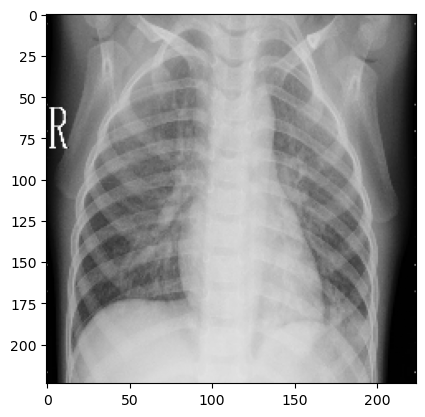

In [21]:
plt.imshow(valPNAimage[0,:,:], cmap=plt.cm.Greys)

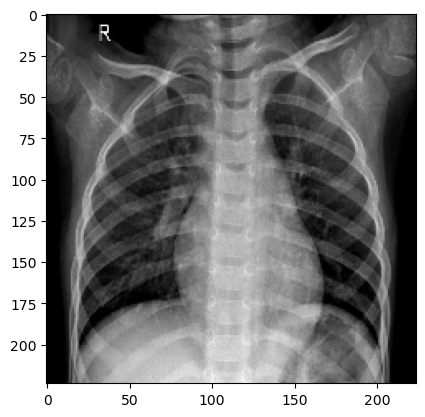

In [22]:
plt.imshow(valNormalimage[0,:,:], cmap=plt.cm.Greys)

# scaling and reshaping (for SVM)

In [26]:
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train.reshape(-1, 1))
X_val_standardized = standard_scaler.transform(X_val.reshape(-1, 1))
X_test_standardized = standard_scaler.transform(X_test.reshape(-1, 1))

In [27]:
X_train_standardized[:20]

array([[-1.53480674],
       [-1.53480674],
       [-1.53480674],
       [-1.56785302],
       [-1.56785302],
       [-1.56785302],
       [-1.56785302],
       [-1.56785302],
       [-1.56785302],
       [-1.55132988],
       [-1.55132988],
       [-1.55132988],
       [-1.56785302],
       [-1.56785302],
       [-1.56785302],
       [-1.55132988],
       [-1.55132988],
       [-1.55132988],
       [-1.58437617],
       [-1.58437617]])

In [31]:
X_train_standardized.shape

(785154048, 1)

In [32]:
X_train_reshaped = X_train_standardized.reshape(-1, *(224, 224, 3))

In [34]:
X_train_reshaped.shape

(5216, 224, 224, 3)

In [37]:
X_train_reshaped = X_train_reshaped.reshape(X_train_reshaped.shape[0], -1)

In [46]:
X_train_reshaped.shape

(5216, 150528)

In [44]:
X_val_reshaped = X_val_standardized.reshape(-1, *(224, 224, 3))
X_val_reshaped = X_val_reshaped.reshape(X_val_reshaped.shape[0], -1)
X_val_reshaped.shape

(16, 150528)

In [48]:
X_test_reshaped = X_test_standardized.reshape(-1, *(224, 224, 3))
X_test_reshaped = X_test_reshaped.reshape(X_test_reshaped.shape[0], -1)
X_test_reshaped.shape

(624, 150528)

### SVM - kernel linear

In [29]:
SVCmodel = SVC(kernel='linear')

In [38]:
SVCmodel.fit(X_train_reshaped, y_train)
# run time: 72m 49.1s

SVC(kernel='linear')

In [49]:
svmPredict = SVCmodel.predict(X_val_reshaped)
svmPredict

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
accuracy_score(y_val, svmPredict)

0.8125

In [54]:
confusion_matrix(y_val, svmPredict) #3 false positves

array([[5, 3],
       [0, 8]])

In [53]:
print(classification_report(y_val, svmPredict))
# precision of PN = 8/11 = 0.73, important in scenarios where misclassifying negative instances as positive is costly or undesirable
# recall of NPN = 5/8 = 0.625, important in scenarios where missing positive instances is more critical than falsely labeling negative instances as positive
# in the case of pneumonia, false positive (high recall of PN) is desirable, more desirable than false negative

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.73      1.00      0.84         8

    accuracy                           0.81        16
   macro avg       0.86      0.81      0.81        16
weighted avg       0.86      0.81      0.81        16



"""
For no pneumonia (NPN) / labeled as 0:

Precision is 1.00: This means that when the model predicts instances as belonging to NPN group, it is highly confident and rarely predicts false positives. = all cases where it predicted the patient as negative for pneumonia, the patient was truly negative.

Recall is 0.62: This means that the model is capturing only 62% of the instances that truly belong to NPN group. In other words, it's missing 38% of the actual instances. = some patients who were negative for pnemonia were falsely diagnosed as positive.


For pneumonia (PN) / labeled as 1:

Precision is 0.73: This means that when the model predicts instances as belonging to PN group, there is a higher chance of some of them being false positives. = of all the patients it predicted as positive for pneumonia, some (27%) of them were actually negative (falsely diagnosed as positive).

Recall is 1.00: This means that the model is capturing all instances that truly belong to PN group. In other words, it has a high sensitivity to detecting instances of PN. = every patient who had pneumonia was successfully predicted/diagnosed.

"""

### random forests

In [55]:
estimators = [50, 100, 200, 300, 400, 500]

In [56]:
rfModel = RandomForestClassifier(n_estimators=estimators[5], random_state=78)

In [57]:
rfModel = rfModel.fit(X_train_reshaped, y_train)
# run time: 11m 40.4s

In [58]:
rfPredict = rfModel.predict(X_val_reshaped)

In [59]:
accuracy_score(y_val, rfPredict)

0.625

In [60]:
confusion_matrix(y_val, rfPredict)

array([[2, 6],
       [0, 8]])

In [61]:
print(classification_report(y_val, rfPredict))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.57      1.00      0.73         8

    accuracy                           0.62        16
   macro avg       0.79      0.62      0.56        16
weighted avg       0.79      0.62      0.56        16



# Resplit val and testing
considerations: overfitting, not enough data for eval, less accurate hyperparameter tuning, get better generalization and statisically significant prescision and recall

In [69]:
print(valNormalimage.shape)
print(valPNAimage.shape)
print(testNormalimage.shape)
print(testPNAimage.shape)
print(valNormalLabel.shape)
print(valPNALabel.shape)
print(testNormalLabel.shape)
print(testPNALabel.shape)

(8, 224, 224, 3)
(8, 224, 224, 3)
(234, 224, 224, 3)
(390, 224, 224, 3)
(8,)
(8,)
(234,)
(390,)


In [70]:
combinedValTestNormalImage = np.concatenate((valNormalimage, testNormalimage), axis=0)
combinedValTestNormalImage.shape

(242, 224, 224, 3)

In [71]:
combinedValTestPNAImage = np.concatenate((valPNAimage, testPNAimage), axis=0)
combinedValTestPNAImage.shape

(398, 224, 224, 3)

In [72]:
combinedValTestNormalLabel = np.concatenate((valNormalLabel, testNormalLabel), axis=0)
print(combinedValTestNormalLabel.shape)
combinedValTestPNALabel = np.concatenate((valPNALabel, testPNALabel), axis=0)
print(combinedValTestPNALabel.shape)

(242,)
(398,)


In [74]:
combinedXValTest = np.concatenate((combinedValTestNormalImage, combinedValTestPNAImage), axis=0)
combinedXValTest.shape

(640, 224, 224, 3)

In [75]:
combinedyValTest = np.concatenate((combinedValTestNormalLabel, combinedValTestPNALabel), axis=0)
combinedyValTest.shape

(640,)

In [76]:
X_val40, X_test60, y_val40, y_test60 = train_test_split(combinedXValTest, combinedyValTest, test_size=0.6, random_state=42)

In [78]:
print(X_val40.shape)
print(X_test60.shape)
print(y_val40.shape)
print(y_test60.shape)

(256, 224, 224, 3)
(384, 224, 224, 3)
(256,)
(384,)


In [81]:
standard_scaler = StandardScaler().fit(X_train.reshape(-1, 1))
X_val40_standardized = standard_scaler.transform(X_val40.reshape(-1, 1))
X_test60_standardized = standard_scaler.transform(X_test60.reshape(-1, 1))
print(X_val40_standardized.shape)
print(X_test60_standardized.shape)

(38535168, 1)
(57802752, 1)


In [82]:
X_val40_reshaped = X_val40_standardized.reshape(-1, *(224, 224, 3))
X_val40_reshaped = X_val40_standardized.reshape(X_val40_reshaped.shape[0], -1)
X_val40_reshaped.shape

(256, 150528)

In [83]:
X_test60_reshaped = X_test60_standardized.reshape(-1, *(224, 224, 3))
X_test60_reshaped = X_test60_standardized.reshape(X_test60_reshaped.shape[0], -1)
X_test60_reshaped.shape

(384, 150528)

### SVM

In [86]:
svmPredict40 = SVCmodel.predict(X_val40_reshaped)
svmPredict40

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [87]:
accuracy_score(y_val40, svmPredict40)

0.74609375

In [88]:
confusion_matrix(y_val40, svmPredict40)

array([[ 25,  65],
       [  0, 166]])

In [89]:
print(classification_report(y_val40, svmPredict40))
# 0.28 false positive
# perfect sensitivity
# worse detection for NPN than before resplit - 0.28

              precision    recall  f1-score   support

           0       1.00      0.28      0.43        90
           1       0.72      1.00      0.84       166

    accuracy                           0.75       256
   macro avg       0.86      0.64      0.64       256
weighted avg       0.82      0.75      0.70       256



### random forests

In [91]:
rfPredict40 = rfModel.predict(X_val40_reshaped)

In [92]:
accuracy_score(y_val40, rfPredict40)

0.74609375

In [93]:
confusion_matrix(y_val40, rfPredict40)

array([[ 27,  63],
       [  2, 164]])

In [94]:
print(classification_report(y_val40, rfPredict40))
# high sensitivity but low precision for PNA

              precision    recall  f1-score   support

           0       0.93      0.30      0.45        90
           1       0.72      0.99      0.83       166

    accuracy                           0.75       256
   macro avg       0.83      0.64      0.64       256
weighted avg       0.80      0.75      0.70       256



In [105]:
rfTP = []
rfTP.append(164/166)
rfFN = []
rfFN.append(2/166)
rfFP = []
rfFP.append(63/(63+164))
rfTN = []
rfTN.append(27/90)
rfTP, rfFN, rfFP, rfTN

([0.9879518072289156], [0.012048192771084338], [0.2775330396475771], [0.3])

In [104]:
rfModel = RandomForestClassifier(n_estimators=estimators[4], random_state=78)
rfModel = rfModel.fit(X_train_reshaped, y_train)
rfPredict40 = rfModel.predict(X_val40_reshaped)

In [127]:
print(accuracy_score(y_val40, rfPredict40))
print(confusion_matrix(y_val40, rfPredict40))
print(classification_report(y_val40, rfPredict40))

0.76953125
[[ 33  57]
 [  2 164]]
              precision    recall  f1-score   support

           0       0.94      0.37      0.53        90
           1       0.74      0.99      0.85       166

    accuracy                           0.77       256
   macro avg       0.84      0.68      0.69       256
weighted avg       0.81      0.77      0.74       256



In [126]:
confusion_matrix(y_val40, rfPredict40)[0][1]

57

In [128]:
rfAC = []
rfTP = []
rfFN = []
rfFP = []
rfTN = []

for i in range(len(estimators)):
    rfModel = RandomForestClassifier(n_estimators=estimators[i], random_state=78)
    rfModel = rfModel.fit(X_train_reshaped, y_train)
    rfPredict40 = rfModel.predict(X_val40_reshaped)
    cm = confusion_matrix(y_val40, rfPredict40)
    rfAC.append(accuracy_score(y_val40, rfPredict40))
    rfTP.append(cm[1][1]/(cm[1][1]+cm[1][0]))
    rfFN.append(cm[1][0]/(cm[1][1]+cm[1][0]))
    rfFP.append(cm[0][1]/(cm[1][1]+cm[0][1]))
    rfTN.append(cm[0][0]/(cm[0][0]+cm[0][1]))
 
rfAC, rfTP, rfFN, rfFP, rfTN
# run time: 37m 54s

([0.76953125, 0.74609375, 0.75, 0.75, 0.75, 0.74609375],
 [0.9879518072289156,
  0.9879518072289156,
  0.9939759036144579,
  0.9939759036144579,
  0.9879518072289156,
  0.9879518072289156],
 [0.012048192771084338,
  0.012048192771084338,
  0.006024096385542169,
  0.006024096385542169,
  0.012048192771084338,
  0.012048192771084338],
 [0.2579185520361991,
  0.2775330396475771,
  0.27631578947368424,
  0.27631578947368424,
  0.2743362831858407,
  0.2775330396475771],
 [0.36666666666666664, 0.3, 0.3, 0.3, 0.3111111111111111, 0.3])

In [179]:
rfSummary = pd.DataFrame({"n_estimators": estimators, "accuracy": rfAC, "true_positive":rfTP,
"false_negative":rfFN, "false_positive": rfFP, "true_negative": rfTN})
rfSummary
# true positive = recall (of PN) = sensitivity

,n_estimators,accuracy,true_positive,false_negative,false_positive,true_negative
0,50,0.769531,0.987952,0.012048,0.257919,0.366667
1,100,0.746094,0.987952,0.012048,0.277533,0.300000
2,200,0.750000,0.993976,0.006024,0.276316,0.300000
3,300,0.750000,0.993976,0.006024,0.276316,0.300000
4,400,0.750000,0.987952,0.012048,0.274336,0.311111
5,500,0.746094,0.987952,0.012048,0.277533,0.300000


In [180]:
dfMinMaxScaler = MinMaxScaler()
columnsNormalize = ['accuracy', 'true_positive', 'false_negative', 'false_positive', 'true_negative']
rfSummaryNormed = rfSummary.copy()
rfSummaryNormed[columnsNormalize] = dfMinMaxScaler.fit_transform(rfSummaryNormed[columnsNormalize])
rfSummaryNormed

,n_estimators,accuracy,true_positive,false_negative,false_positive,true_negative
0,50,1.000000,0.0,1.0,0.000000,1.000000
1,100,0.000000,0.0,1.0,1.000000,0.000000
2,200,0.166667,1.0,0.0,0.937941,0.000000
3,300,0.166667,1.0,0.0,0.937941,0.000000
4,400,0.166667,0.0,1.0,0.837021,0.166667
5,500,0.000000,0.0,1.0,1.000000,0.000000


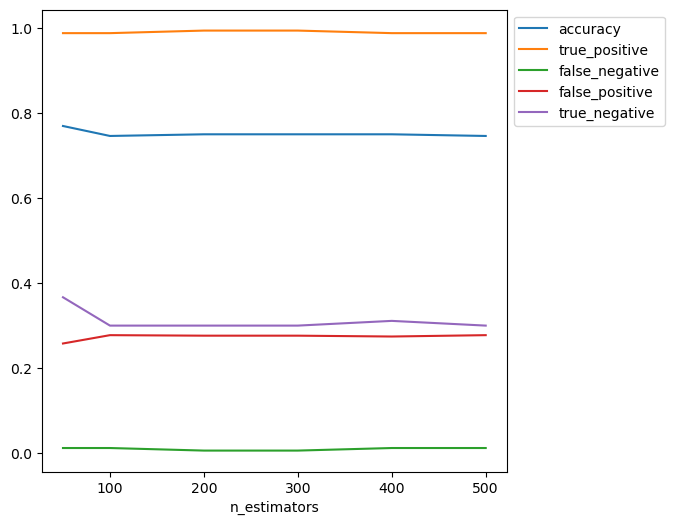

In [183]:
rfSummary.plot(kind="line", x="n_estimators", y=["accuracy", "true_positive", "false_negative", 
"false_positive", "true_negative"], figsize=(6,6)).legend(loc='upper left', bbox_to_anchor=(1, 1))


<Axes: xlabel='n_estimators'>

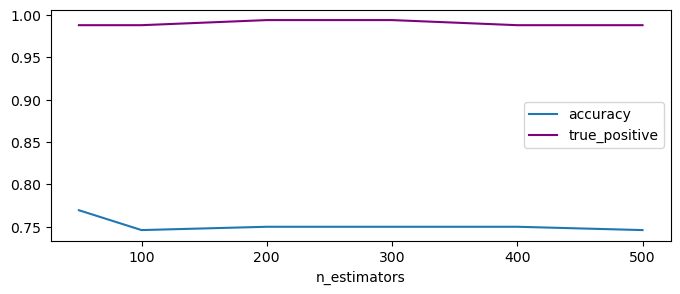

In [214]:
rfSummary.plot(kind="line", x="n_estimators", y=["accuracy", "true_positive"], figsize=(8,3), color=["#1f77b4", "purple"], ylabel="# trees in model", title="random forest")


<Axes: >

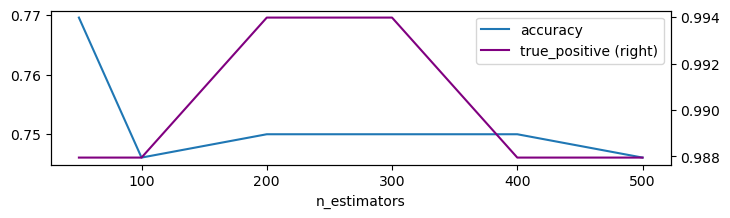

In [193]:
ax = rfSummary.plot(x='n_estimators', y='accuracy', kind='line')
rfSummary.plot(x='n_estimators', y="true_positive", color="purple",
               kind='line', ax=ax, secondary_y=True, figsize=(8,2))
#figsize=(6,6)).legend(loc='upper left', bbox_to_anchor=(1, 1))


<Axes: >

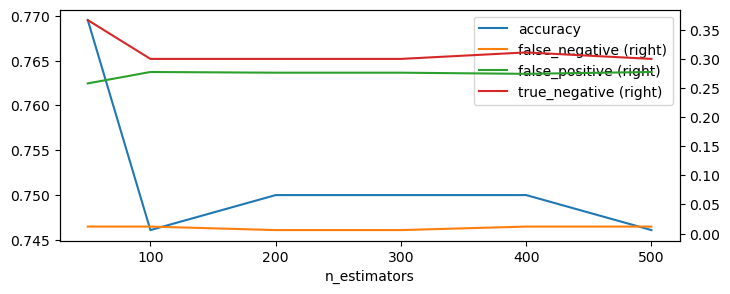

In [203]:
ax = rfSummary.plot(x='n_estimators', y='accuracy', kind='line')
rfSummary.plot(x='n_estimators', y=['false_negative', 'false_positive', 'true_negative'],
               kind='line', ax=ax, secondary_y=True, figsize=(8,3),
               ylabel="# trees in model", title="random forest")

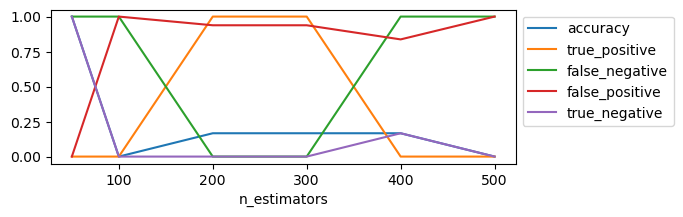

In [181]:
rfSummaryNormed.plot(kind="line", x="n_estimators", y=["accuracy", "true_positive", "false_negative", 
"false_positive", "true_negative"], figsize=(6,2)).legend(loc='upper left', bbox_to_anchor=(1, 1))
# false_negative being low is desirable

In [217]:
new_estimators = [10, 20, 30, 50]
rfAC = []
rfTP = []
rfFN = []
rfFP = []
rfTN = []

for i in range(len(new_estimators)):
    rfModel = RandomForestClassifier(n_estimators=new_estimators[i], random_state=78)
    rfModel = rfModel.fit(X_train_reshaped, y_train)
    rfPredict40 = rfModel.predict(X_val40_reshaped)
    cm = confusion_matrix(y_val40, rfPredict40)
    rfAC.append(accuracy_score(y_val40, rfPredict40))
    rfTP.append(cm[1][1]/(cm[1][1]+cm[1][0]))
    rfFN.append(cm[1][0]/(cm[1][1]+cm[1][0]))
    rfFP.append(cm[0][1]/(cm[1][1]+cm[0][1]))
    rfTN.append(cm[0][0]/(cm[0][0]+cm[0][1]))

rfAC, rfTP, rfFN, rfFP, rfTN
# run time: 4m 5.7s

([0.78515625, 0.765625, 0.7734375, 0.76953125],
 [0.9939759036144579,
  0.9939759036144579,
  0.9879518072289156,
  0.9879518072289156],
 [0.006024096385542169,
  0.006024096385542169,
  0.012048192771084338,
  0.012048192771084338],
 [0.2465753424657534,
  0.26339285714285715,
  0.2545454545454545,
  0.2579185520361991],
 [0.4, 0.34444444444444444, 0.37777777777777777, 0.36666666666666664])

### KNN

In [222]:
np.sqrt(X_train.shape[0])

72.22188034107116

In [223]:
kmmModel = KNeighborsClassifier(n_neighbors=73)
kmmModel = kmmModel.fit(X_train_reshaped, y_train)
knnPredict40 = kmmModel.predict(X_val40_reshaped)
cm = confusion_matrix(y_val40, knnPredict40)
# run time: 22.2s

In [227]:
knnAC = []
knnTP = []
knnFN = []
knnFP = []
knnTN = []
knnAC.append(accuracy_score(y_val40, knnPredict40))
knnTP.append(cm[1][1]/(cm[1][1]+cm[1][0]))
knnFN.append(cm[1][0]/(cm[1][1]+cm[1][0]))
knnFP.append(cm[0][1]/(cm[1][1]+cm[0][1]))
knnTN.append(cm[0][0]/(cm[0][0]+cm[0][1]))
knnTP, knnFN, knnFP, knnTN

([0.9879518072289156],
 [0.012048192771084338],
 [0.3080168776371308],
 [0.18888888888888888])

In [226]:
print(accuracy_score(y_val40, knnPredict40))
print(confusion_matrix(y_val40, knnPredict40))
print(classification_report(y_val40, knnPredict40))

0.70703125
[[ 17  73]
 [  2 164]]
              precision    recall  f1-score   support

           0       0.89      0.19      0.31        90
           1       0.69      0.99      0.81       166

    accuracy                           0.71       256
   macro avg       0.79      0.59      0.56       256
weighted avg       0.76      0.71      0.64       256

